Найти в интернете любую выборку объёма не менее 100 наблюдений, если вы будете делать программу для её обработки, не менее 20 наблюдений, если вы будете считать вручную.
- По этой выборке (желательно программно, но можно и вручную) построить графики выборочной функции распределения, гистограммы и/или ядерной оценки плотности вероятности.
- В предположении, что наблюдения имеют нормальное распределение, построить односторонние и двусторонние доверительные интервалы надёжности 0,9 и 0,95 для математического ожидания и дисперсии.

In [46]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv('russia-population-2020-06-05.csv')

## Построим гистограмму

In [58]:
import matplotlib.pyplot as plt


(array([ 2.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
         1.,  2.,  1.,  2.,  2.,  3.,  2.,  2.,  1.,  2.,  2.,  1.,  2.,
         8., 10.,  7., 11.]),
 array([1.02798657e+08, 1.04317821e+08, 1.05836985e+08, 1.07356149e+08,
        1.08875313e+08, 1.10394478e+08, 1.11913642e+08, 1.13432806e+08,
        1.14951970e+08, 1.16471134e+08, 1.17990298e+08, 1.19509462e+08,
        1.21028626e+08, 1.22547790e+08, 1.24066954e+08, 1.25586118e+08,
        1.27105283e+08, 1.28624447e+08, 1.30143611e+08, 1.31662775e+08,
        1.33181939e+08, 1.34701103e+08, 1.36220267e+08, 1.37739431e+08,
        1.39258595e+08, 1.40777760e+08, 1.42296924e+08, 1.43816088e+08,
        1.45335252e+08, 1.46854416e+08, 1.48373580e+08]),
 <a list of 30 Patch objects>)

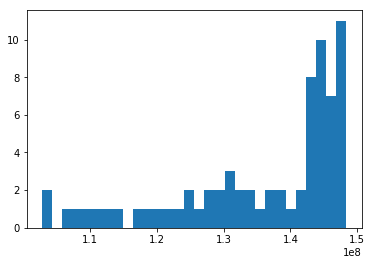

In [13]:
plt.hist(data[' Population'], bins = 30)

# ядерная оцека плотности вероятности

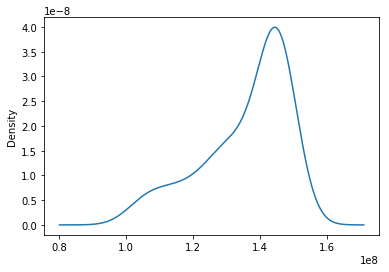

In [22]:
data[' Population'].plot.kde()

In [25]:
import scipy

# Нормализуем выборку методом Бокса-Кокса

In [64]:
q = scipy.stats.boxcox(data[' Population'])

In [33]:
import seaborn as sns
from seaborn import distplot

([array([0., 1., 4., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
         1., 1., 1., 1., 1., 3., 8., 3., 5., 5., 3., 2., 7.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([7.60608238e+00, 6.21912037e+59, 1.24382407e+60, 1.86573611e+60,
        2.48764815e+60, 3.10956018e+60, 3.73147222e+60, 4.35338426e+60,
        4.97529629e+60, 5.59720833e+60, 6.21912037e+60, 6.84103240e+60,
        7.46294444e+60, 8.08485647e+60, 8.70676851e+60, 9.32868055e+60,
        9.95059258e+60, 1.05725046e+61, 1.11944167e+61, 1.18163287e+61,
        1.24382407e+61, 1.30601528e+61, 1.36820648e+61, 1.43039768e+61,
        1.49258889e+61, 1.55478009e+61, 1.61697129e+61, 1.67916250e+61,
        1.74135370e+61, 1.80354491e+61, 1.86573611e+61]),
 <a list of 2 Lists of Patches objects>)

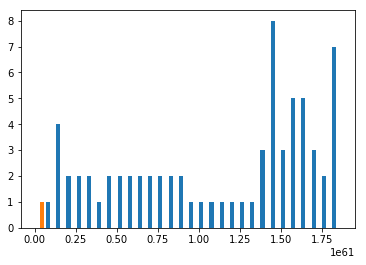

In [44]:
plt.hist(q, bins = 30)

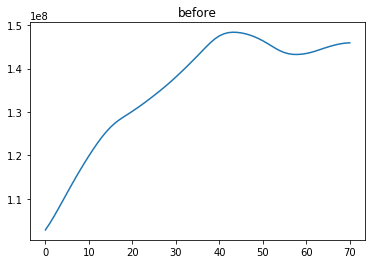

In [69]:
fig, ax = plt.subplots()
ax.plot(data[' Population'])
ax.set(title='before')
plt.show()

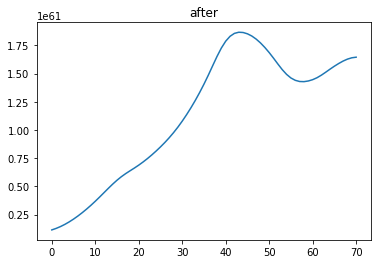

In [70]:
fig, ax = plt.subplots()
ax.plot(q[0])
ax.set(title='after')
plt.show()

# Построим доверительные интревалы
### 1) Слегка измененный велосипед - тут легче формулу увидеть
### 2) Встроенными методами. Результаты ооочень близки

In [80]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se =  scipy.stats.tmean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [81]:
print(mean_confidence_interval(q[0]))

(1.1274963755845726e+61, 9.928112868175536e+60, 1.2621814643515916e+61)


In [87]:
mean, sigma = np.mean(q[0]), np.std(q[0])

stats.norm.interval(0.95, loc=mean, scale=sigma/ np.sqrt(len(q[0])))

(9.960746676701064e+60, 1.2589180834990389e+61)